In [2]:
#resource source: 
#https://raw.githubusercontent.com/Harvard-IACS/2019-CS109B/master/content/styles/cs109.css
from IPython.core.display import HTML
def css_styling():
    styles=open("C:/Users/CASA/CS109A/LAB1_INTROTOPYTHON/cs109.css","r").read()
    return HTML(styles)
css_styling()

In [3]:
import pandas as pd
import sys
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from math import radians, cos, sin, asin, sqrt
import datetime
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set(style="ticks")
%matplotlib inline

In [4]:
#resource source:
#https://www.kaggle.com/datasets/codebreaker619/boston-hubway-data-visualization-challenge-dataset
hubway_data_file="C:/Users/CASA/CS109A/LAB1_INTROTOPYTHON/hubway_trips.csv"
hubway_data=pd.read_csv(hubway_data_file,low_memory=False)
hubway_data.head()

,seq_id,hubway_id,status,duration,start_date,strt_statn,end_date,end_statn,bike_nr,subsc_type,zip_code,birth_date,gender
0,1,8,Closed,9,7/28/2011 10:12:00,23.0,7/28/2011 10:12:00,23.0,B00468,Registered,'97217,1976.0,Male
1,2,9,Closed,220,7/28/2011 10:21:00,23.0,7/28/2011 10:25:00,23.0,B00554,Registered,'02215,1966.0,Male
2,3,10,Closed,56,7/28/2011 10:33:00,23.0,7/28/2011 10:34:00,23.0,B00456,Registered,'02108,1943.0,Male
3,4,11,Closed,64,7/28/2011 10:35:00,23.0,7/28/2011 10:36:00,23.0,B00554,Registered,'02116,1981.0,Female
4,5,12,Closed,12,7/28/2011 10:37:00,23.0,7/28/2011 10:37:00,23.0,B00554,Registered,'97214,1983.0,Female


 # Who?

In [6]:
year_to_age=lambda s: 0 if "N" in s else 2017 - int(s)

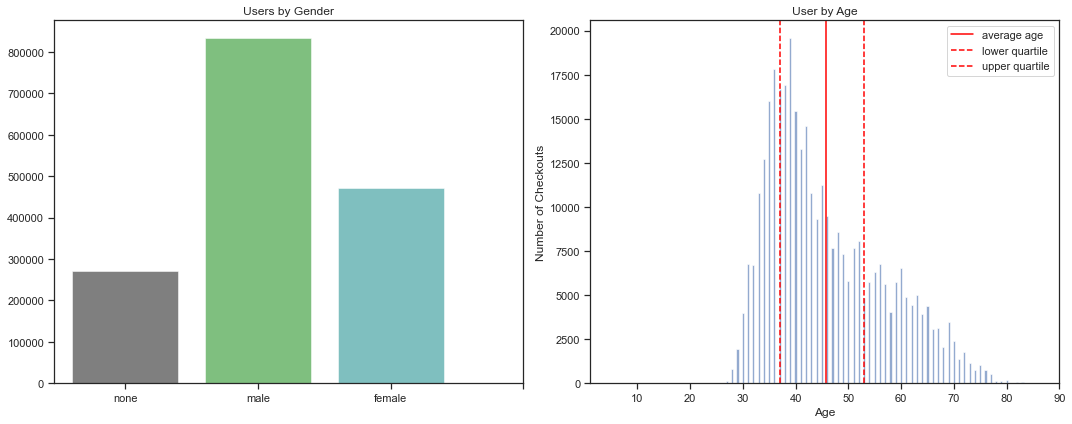

In [36]:
fig,ax=plt.subplots(1,2,figsize=(15,6),facecolor="white")
gender_counts=np.unique(hubway_data["gender"].replace(np.nan, "Nan", regex=True).values, return_counts=True)
ax[0].bar(range(3),gender_counts[1], align="center", color=["black","green","teal"],alpha=0.5)
ax[0].set_xticks([0,1,2,3])
ax[0].set_xticklabels(["none","male","female"," "])
ax[0].set_title("Users by Gender")

age_col=2022.0 - hubway_data["birth_date"].dropna().values
age_counts=np.unique(age_col,return_counts=True)
ax[1].bar(age_counts[0], age_counts[1],align="center", width=0.4, alpha=0.6)
ax[1].axvline(x=np.mean(age_col), color="red", label="average age")
ax[1].axvline(x=np.percentile(age_col,25), color="red", linestyle="--", label="lower quartile")
ax[1].axvline(x=np.percentile(age_col,75), color="red", linestyle="--",label="upper quartile")
ax[1].set_xlim([1,90])
ax[1].set_xlabel("Age")
ax[1].set_ylabel("Number of Checkouts")
ax[1].legend()
ax[1].set_title("User by Age")

plt.tight_layout()
plt.savefig("Who.png", dpi=300)
#plt.show()

# Where

In [41]:
station_data=pd.read_csv("C:/Users/CASA/CS109A/LAB1_INTROTOPYTHON/hubway_stations.csv", low_memory=False)[["id","lat","lng"]]
station_data.head()

,id,lat,lng
0,3,42.340021,-71.100812
1,4,42.345392,-71.069616
2,5,42.341814,-71.090179
3,6,42.361285,-71.065140
4,7,42.353412,-71.044624


In [47]:
station_data.set_index("id")

,lat,lng
id,,
3,42.340021,-71.100812
4,42.345392,-71.069616
5,42.341814,-71.090179
6,42.361285,-71.065140
7,42.353412,-71.044624
...,...,...
141,42.400877,-71.116772
142,42.404490,-71.123413
143,42.390820,-71.109420


In [46]:
hubway_data_with_gps=hubway_data.join(station_data.set_index("id"),on="strt_statn")
hubway_data_with_gps.head()

,seq_id,hubway_id,status,duration,start_date,strt_statn,end_date,end_statn,bike_nr,subsc_type,zip_code,birth_date,gender,lat,lng
0,1,8,Closed,9,7/28/2011 10:12:00,23.0,7/28/2011 10:12:00,23.0,B00468,Registered,'97217,1976.0,Male,42.359677,-71.059364
1,2,9,Closed,220,7/28/2011 10:21:00,23.0,7/28/2011 10:25:00,23.0,B00554,Registered,'02215,1966.0,Male,42.359677,-71.059364
2,3,10,Closed,56,7/28/2011 10:33:00,23.0,7/28/2011 10:34:00,23.0,B00456,Registered,'02108,1943.0,Male,42.359677,-71.059364
3,4,11,Closed,64,7/28/2011 10:35:00,23.0,7/28/2011 10:36:00,23.0,B00554,Registered,'02116,1981.0,Female,42.359677,-71.059364
4,5,12,Closed,12,7/28/2011 10:37:00,23.0,7/28/2011 10:37:00,23.0,B00554,Registered,'97214,1983.0,Female,42.359677,-71.059364


# When

In [49]:
check_out_times=pd.to_datetime(hubway_data["start_date"])

In [50]:
check_out_hours=hubway_data["start_date"].apply(lambda s: int(s[-8:-6]))

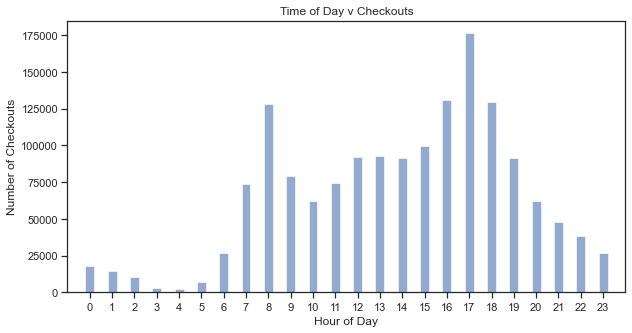

In [102]:
fig,ax=plt.subplots(1,1,figsize=(10,5),facecolor="white")
check_out_counts=np.unique(check_out_hours, return_counts=True)
ax.bar(check_out_counts[0], check_out_counts[1], align="center", width=0.4, alpha=0.6)
ax.set_xlim([-1,24])
ax.set_xticks(range(24))
ax.set_xlabel("Hour of Day")
ax.set_ylabel("Number of Checkouts")
ax.set_title("Time of Day v Checkouts")
plt.savefig("When.png",dpi=300)


# How

In [75]:
def haversine(pt, lat2=42.35589, lon2=-71.060175):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)
    """
    lon1=pt[0]
    lat1=pt[1]
    
    #convert decimal degrees to radians
    lon1,lat1, lon2, lat2 = map(radians,[lon1,lat1,lon2,lat2])
    
    #haversine formula
    dlon=lon2-lon1
    dlat=lat2-lat1
    a=sin(dlat/2)**2 + cos(lat1) * cos(lat2)*sin(dlon/2)**2
    c=2*asin(sqrt(a))
    r=3956 #Radius of earth in miles
    return  c*r

In [79]:
station_counts=np.unique(hubway_data_with_gps["strt_statn"].dropna(),return_counts=True)
counts_df=pd.DataFrame({"id":station_counts[0],"checkouts":station_counts[1]})
counts_df=counts_df.join(station_data.set_index("id"),on="id")
counts_df.head()

,id,checkouts,lat,lng
0,3.0,9734,42.340021,-71.100812
1,4.0,18058,42.345392,-71.069616
2,5.0,10630,42.341814,-71.090179
3,6.0,23322,42.361285,-71.065140
4,7.0,9163,42.353412,-71.044624


In [81]:
counts_df.loc[:,"dist_to_center"]=list(map(haversine,counts_df[["lng","lat"]].values))
counts_df.head()

,id,checkouts,lat,lng,dist_to_center
0,3.0,9734,42.340021,-71.100812,2.345339
1,4.0,18058,42.345392,-71.069616,0.870326
2,5.0,10630,42.341814,-71.090179,1.813472
3,6.0,23322,42.361285,-71.065140,0.450472
4,7.0,9163,42.353412,-71.044624,0.811706


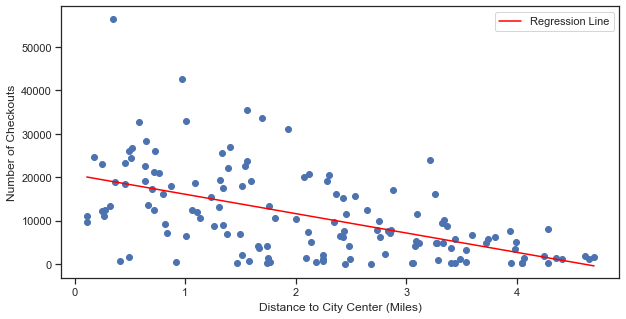

In [101]:
fig,ax=plt.subplots(1,1,figsize=(10,5),facecolor="white")
ax.scatter(counts_df["dist_to_center"].values,counts_df["checkouts"].values)
reg_line=LinearRegression()
reg_line.fit(counts_df["dist_to_center"].values.reshape((len(counts_df["dist_to_center"]),1)),counts_df["checkouts"].values)
distances=np.linspace(counts_df["dist_to_center"].min(),counts_df["dist_to_center"].max(),50)
ax.plot(distances,reg_line.predict(distances.reshape((len(distances),1))),color="red",label="Regression Line")
ax.set_xlabel("Distance to City Center (Miles)")
ax.set_ylabel("Number of Checkouts")
ax.legend()

plt.savefig("How.png", dpi=300)